# Clustering Denetimsiz-Unsupervised learning Hedef yok

In [1]:
import pandas as pd

In [2]:
df=pd.read_excel('cars.xls')

In [3]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#elbow method

In [5]:
x=df[['Price', 'Mileage','Cylinder']]

In [6]:
x.head()

,Price,Mileage,Cylinder
0,17314.103129,8221,6
1,17542.036083,9135,6
2,16218.847862,13196,6
3,16336.913140,16342,6
4,16339.170324,19832,6


In [8]:
model=KMeans(n_clusters=4) # arabalari 4 gruba ayirdik

In [10]:
model=model.fit(x)

In [11]:
tahmin=model.predict(x)

In [12]:
tahmin

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 0, 1,
       1, 0, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0,
       3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,

In [13]:
x['cluster']=tahmin

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_8716\1051485789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['cluster']=tahmin


In [14]:
x.head()

,Price,Mileage,Cylinder,cluster
0,17314.103129,8221,6,2
1,17542.036083,9135,6,2
2,16218.847862,13196,6,2
3,16336.913140,16342,6,2
4,16339.170324,19832,6,1


In [15]:
silhouette_score(x,tahmin)

0.41455890068370477

In [17]:
import matplotlib.pyplot as plt

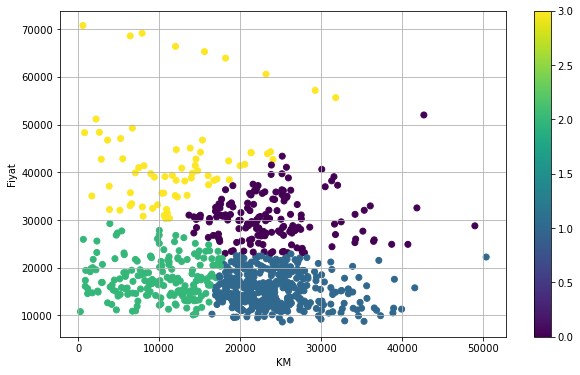

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(x.Mileage,x.Price,c=tahmin)
plt.xlabel('KM')
plt.ylabel('Fiyat')
plt.colorbar()
plt.grid()

In [28]:
allscore=[]
allclusters=[]
uzakliklar=[]
def clust(kactane):
    for i in range(1,kactane+1):
        i=i+1
        model=KMeans(n_clusters=i)
        model=model.fit(x)
        tahmin=model.predict(x)
        score=silhouette_score(x,tahmin)
        uzaklik=model.inertia_
        print('cluster ', i,'score ',score)
        allscore.append(score)
        allclusters.append(i)
        uzakliklar.append(uzaklik)
clust(10)

cluster  2 score  0.45170118943625676
cluster  3 score  0.4132108637455949
cluster  4 score  0.41455890068370477
cluster  5 score  0.3546590310884144
cluster  6 score  0.3604052556059969
cluster  7 score  0.3603913785902186
cluster  8 score  0.33639135199789655
cluster  9 score  0.3644035515934206
cluster  10 score  0.3563559650249961
cluster  11 score  0.3607264158567524


In [33]:
# bir fonksiyon yardimiyla veriyi kaca bolmeyi, en optimum grup saysini tespik ettik. Kendini tekrar eden yuzdeye kadar grup sayisini bulduk
#Burada 5 ten sonra kendini tekrar etti yani 4 kume ideal

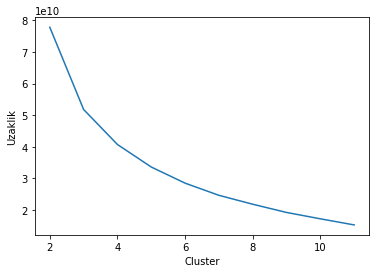

In [31]:
plt.xlabel('Cluster')
plt.ylabel('Uzaklik')
plt.plot(allclusters,uzakliklar);

In [34]:
# elbow metodunun gosterdigi uzere veriyi 4 farkli kumede toplamainin en ideal oldugu dusunuyoruz
#ucuz ve uzerinde az KM olan , ucuz olup cok KM, pahali ama az KM, orta olacak sekilde 4 gruba ayirabiliriz

In [37]:
df[df['Price']>60000]

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
150,70755.466717,583,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
151,68566.187189,6420,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
152,69133.731722,7892,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
153,66374.307040,12021,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
154,65281.481237,15600,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
155,63913.117248,18200,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
156,60567.549093,23193,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
